GO TO THE FOLLOWING NOTEBOOK ANF COPY ON YOUR DRIVE AND APPLY NECESSARY ML ALGORITHM FOR GIVEN DATASET. EVALUTE THE MODEL USING ONE FEATURE AND MULTIPLE FEATURE. USE FEATURE SELECTION TECHNIQUE TO SELECT ONE FEATURE.

# data loading and preprocessing

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('ads.csv')

In [14]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [17]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
# finding missing values
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [20]:
# find correlation of data
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


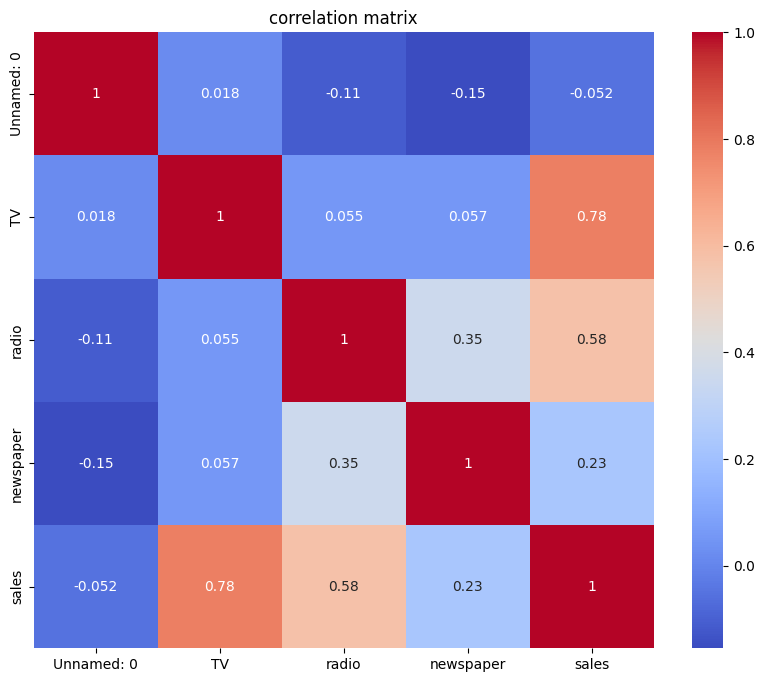

In [21]:
# visualizing correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("correlation matrix")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

In [23]:
# Split the data into features and target variable
X = df.drop('sales', axis=1)
y = df['TV']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Fit Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [26]:
one_feature_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
print("Lasso MSE using one feature:", one_feature_mse)

Lasso MSE using one feature: 0.00016721792989841537


In [27]:
# Fit Elastic Net model
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [28]:
one_feature_mse = mean_squared_error(y_test, elasticnet_model.predict(X_test))
print("Elastic Net MSE using one feature:", one_feature_mse)


Elastic Net MSE using one feature: 0.00016719432072499922


In [29]:
# Perform feature selection using Lasso
lasso_selector = SelectFromModel(estimator=lasso_model, prefit=True)
X_train_selected = lasso_selector.transform(X_train)
X_test_selected = lasso_selector.transform(X_test)

C:\Users\Deepa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Deepa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [31]:
# Fit Lasso model on selected features
lasso_model_selected = Lasso()
lasso_model_selected.fit(X_train_selected, y_train)

Lasso()

In [32]:
# Evaluate Lasso model using selected features
selected_feature_mse = mean_squared_error(y_test, lasso_model_selected.predict(X_test_selected))
print("Lasso MSE using selected features:", selected_feature_mse)

Lasso MSE using selected features: 0.00016721792989841537
